In [123]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import interact

In [45]:
def quaternion(angle, vector):
    vector = np.array(vector).astype(float)
    vector /= np.sqrt(vector[0]**2 + vector[1]**2 + vector[2]**2)
    return np.array((np.cos(angle/2), *np.sin(angle/2)*np.array(vector)))

def quat_prod(p, q):
    res = np.zeros(4)
    p, q = np.array((p,q))
    res[0] = p[0]*q[0] - np.dot(p[1:], q[1:])
    res[1:] = p[0]*q[1:] + q[0]*p[1:] + np.cross(p[1:], q[1:])
    return res

In [46]:
quaternion(np.pi/2,[1,1,0])

array([0.70710678, 0.5       , 0.5       , 0.        ])

In [60]:
quaternion(0,[1,0,0])

array([1., 0., 0., 0.])

In [59]:
quat_prod(quaternion(0,[1,0,0]), [0,1,0,0])

array([0., 1., 0., 0.])

Format: `[q_1, q_2, q_3, q_4, w1, w2, w3]`

In [75]:
init = np.array((*quaternion(0,[1,0,0]), np.pi,0,0))
print(init)

[1.         0.         0.         0.         3.14159265 0.
 0.        ]


In [78]:
def derivatives(t, state, forces, I):
    res = np.zeros(7)
    q, w = state[:4], state[4:]
    res[:4] = quat_prod(.5*q, (0, *w))
    res[4:] = -np.cross(w, I*w)/I
    return res

In [81]:
derivatives(0, init, 0,np.array((1,1,1)))

array([ 0.        ,  1.57079633,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ])

In [82]:
def euler(func, init, t, args):
    r = np.zeros((len(t), len(init)))
    r[0] = init
    for i in range(1, len(t)):
        r[i] = r[i-1] + (t[i]-t[i-1]) * func(t[i-1], r[i-1], *args)
    return r

<IPython.core.display.Javascript object>


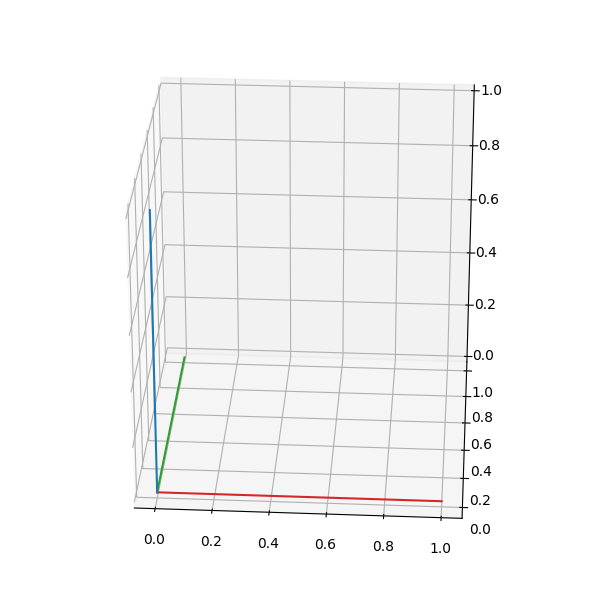

interactive(children=(IntSlider(value=0, description='val', max=99), Output()), _dom_classes=('widget-interact…

In [150]:
init = np.array((*quaternion(0,[1,1,0]), np.pi/np.sqrt(2),np.pi/np.sqrt(2),0))
res = euler(derivatives, init, np.linspace(0,1,100), args=([], np.array((1,1,1))))
qs = res[:,:4]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

xr = quat_prod(quat_prod(qs[0], [0,1,0,0]), qs[0]*[1,-1,-1,-1])
lx, = ax.plot([0,xr[1]], [0, xr[2]], [0, xr[3]], c="tab:red")

yr = quat_prod(quat_prod(qs[0], [0,0,1,0]), qs[0]*[1,-1,-1,-1])
ly, = ax.plot([0,yr[1]], [0, yr[2]], [0, yr[3]], c="tab:green")

zr = quat_prod(quat_prod(qs[0], [0,0,0,1]), qs[0]*[1,-1,-1,-1])
lz, = ax.plot([0,zr[1]], [0, zr[2]], [0, zr[3]], c="tab:blue")

@interact(val=(0,len(qs)-1))
def update(val=0):
    i = val
    # update curve
    xr = quat_prod(quat_prod(qs[i], [0,1,0,0]), qs[i]*[1,-1,-1,-1])
    lx.set_data([0,xr[1]], [0, xr[2]])
    lx.set_3d_properties([0, xr[3]])
    
    yr = quat_prod(quat_prod(qs[i], [0,0,1,0]), qs[i]*[1,-1,-1,-1])
    ly.set_data([0,yr[1]], [0, yr[2]])
    ly.set_3d_properties([0, yr[3]])
    
    zr = quat_prod(quat_prod(qs[i], [0,0,0,1]), qs[i]*[1,-1,-1,-1])
    lz.set_data([0,zr[1]], [0, zr[2]])
    lz.set_3d_properties([0, zr[3]])
    # redraw canvas while idle
    fig.canvas.draw_idle()


plt.tight_layout()
plt.show()